In [41]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,8

In [42]:
data = pd.read_csv("amazon.csv", encoding='latin1')
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [43]:
data.rename(columns={'number': 'number_fires'}, inplace=True)

In [44]:
states_dict = {'Acre':'AC', 'Alagoas':'AL', 'Amapa': 'AP', 'Amazonas': 'AM', 'Bahia':'BA', 'Ceara': 'CE', 'Distrito Federal': 'DF', 
 'Espirito Santo': 'ES', 'Goias': 'GO', 'Maranhao': 'MA', 'Mato Grosso': 'MT', 'Minas Gerais': 'MG', 'Paraiba': 'PB',
 'Pará': 'PA', 'Pernambuco': 'PE', 'Piau': 'PI', 'Rio': 'RJ', 'Rondonia': 'RD', 'Roraima': 'RR', 'Santa Catarina': 'SC',
 'Sao Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'}

states = [states_dict[row['state']] for idx, row in data.iterrows()]
data.state = states

In [45]:
data.tail()

,year,state,month,number_fires,date
6449,2012,TO,Dezembro,128.0,2012-01-01
6450,2013,TO,Dezembro,85.0,2013-01-01
6451,2014,TO,Dezembro,223.0,2014-01-01
6452,2015,TO,Dezembro,373.0,2015-01-01
6453,2016,TO,Dezembro,119.0,2016-01-01


In [46]:
data02 = data[['state', 'year', 'number_fires']]
data02 = data02.groupby('state').apply(
    lambda x: x.sort_values(['number_fires'], ascending=False)).reset_index(drop=True)
data02.head(n=10)

,state,year,number_fires
0,AC,2007,960.0
1,AC,2015,905.0
2,AC,2006,839.0
3,AC,2003,740.0
4,AC,2012,739.0
5,AC,2002,728.0
6,AC,2002,687.0
7,AC,2013,679.0
8,AC,2008,652.0
9,AC,2004,645.0


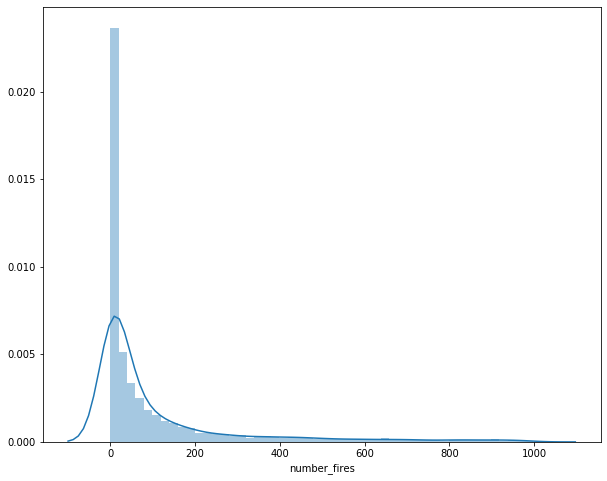

In [66]:
ax = sns.distplot(data02['number_fires'])

In [48]:
data03 = data.groupby(['state', 'year']).agg({'number_fires': sum})
data03.sort_values('number_fires', ascending=False)

number_fires
state year              
MT    2009      8188.717
      2003      6939.854
      2015      6261.087
      2010      6252.445
      2014      5890.597
...                  ...
DF    1999        46.000
SE    2001        24.000
RR    1998        21.000
SE    1998        20.000
      2000        17.000

[460 rows x 1 columns]

In [49]:
data04 = data.groupby('state').agg({'number_fires': sum})
data04.sort_values('number_fires', ascending=False)

,number_fires
state,
MT,96246.028
PB,52435.918
SP,51121.198
RJ,45160.865
BA,44746.226
PI,37803.747
GO,37695.520
MG,37475.258
TO,33707.885


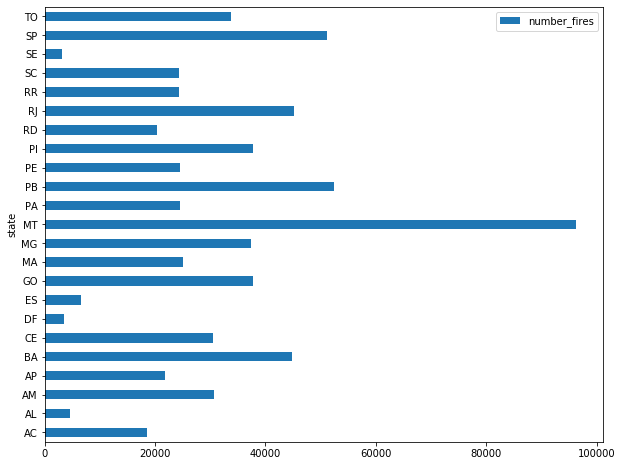

In [50]:
data04.plot.barh()

In [51]:
states = [idx for idx, row in data04.iterrows()]
burneds = [row['number_fires'] for idx, row in data04.iterrows()]

total_fires_by_state = {'state': states, 'total_fires': burneds}
total_fires_by_state = pd.DataFrame(total_fires_by_state, columns=['state', 'total_fires'])
total_fires_by_state

,state,total_fires
0,AC,18464.030
1,AL,4644.000
2,AM,30650.129
3,AP,21831.576
4,BA,44746.226
5,CE,30428.063
6,DF,3561.000
7,ES,6546.000
8,GO,37695.520
9,MA,25129.131


In [52]:
data05 = data.groupby('year').agg({'number_fires': sum})
data05

,number_fires
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600
2003,42760.674
2004,38453.163
2005,35004.965
2006,33832.161


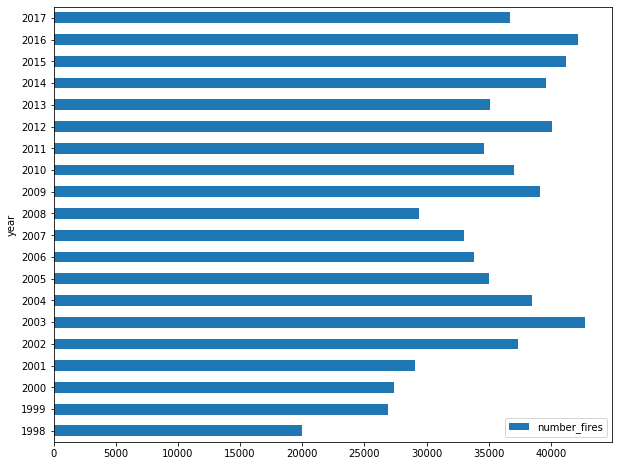

In [53]:
data05.plot.barh()

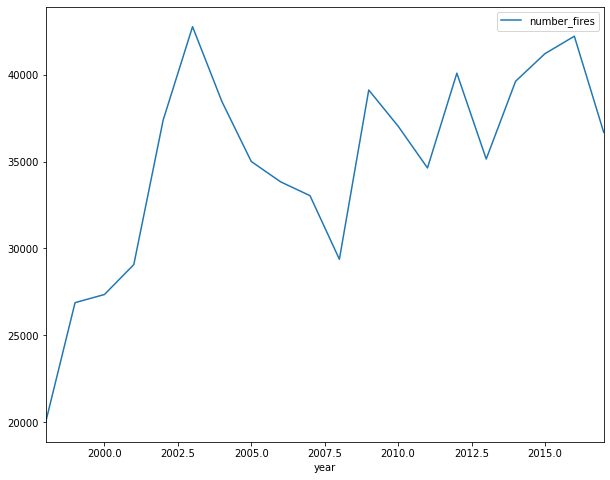

In [54]:
data05.plot()

In [55]:
years = [idx for idx, row in data05.iterrows()]
burneds = [row['number_fires'] for idx, row in data05.iterrows()]

total_fires_by_year = {'year': years, 'total_fires': burneds}
total_fires_by_year = pd.DataFrame(total_fires_by_year, columns=['year', 'total_fires'])
total_fires_by_year.reset_index()

,index,year,total_fires
0,0,1998,20013.971
1,1,1999,26882.821
2,2,2000,27351.251
3,3,2001,29071.612
4,4,2002,37390.600
5,5,2003,42760.674
6,6,2004,38453.163
7,7,2005,35004.965
8,8,2006,33832.161
9,9,2007,33037.413


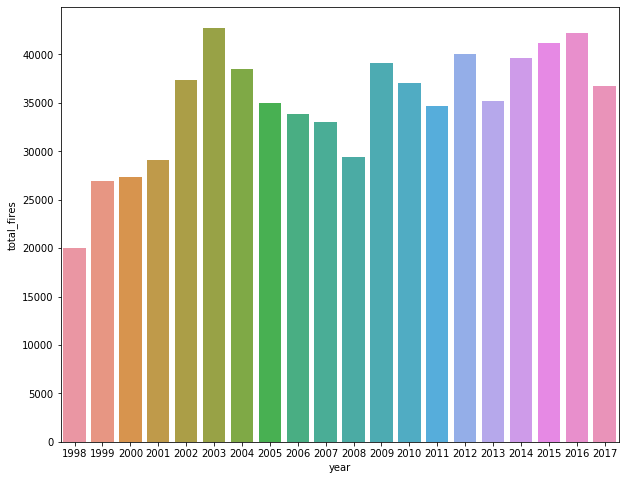

In [56]:
ax02 = sns.barplot(x="year", y="total_fires", data=total_fires_by_year)

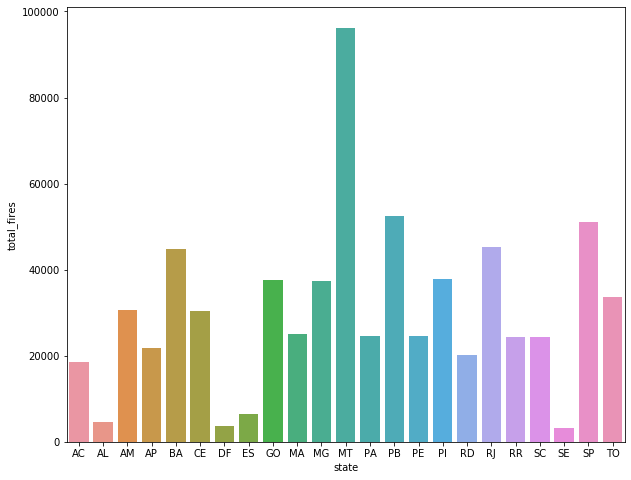

In [57]:
ax03 = sns.barplot(x="state", y="total_fires", data=total_fires_by_state)

In [58]:
data06 = data.groupby(['year','month']).agg({'number_fires': sum})
data06 = data06.loc[data06['number_fires'] > 0]
data06

number_fires
year month                 
1998 Agosto        3964.616
     Dezembro      2043.407
     Julho         4357.712
     Junho         1352.201
     Novembro      2710.098
...                     ...
2017 Maio          2506.000
     Março         2017.000
     Novembro      6217.379
     Outubro       3600.159
     Setembro      2779.317

[234 rows x 1 columns]

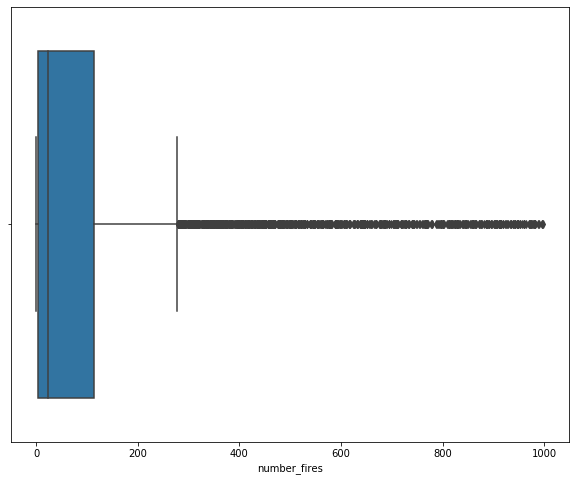

In [59]:
ax04 = sns.boxplot(x = data['number_fires'])